<a href="https://colab.research.google.com/github/Anil-kumar-mallik/twitter-sentiment-analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Extraction

In [ ]:
import csv
import configparser
from textblob import TextBlob
import tweepy
import time

# Set your Twitter API credentials
config = configparser.ConfigParser()
config.read('kk.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# Authenticating credentials
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Define the query parameters
query = "covid19"
max_tweets = 50  # Maximum number of tweets to retrieve

# Retrieve tweets
tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode="extended").items(max_tweets)

# Define the CSV file path
csv_file_path = "tweets.csv"

# Open the CSV file in write mode
with open(csv_file_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header row
    csv_writer.writerow(["Username", "Text", "Retweets", "Favorites", "Sentiment"])

    # Iterate over the tweets and write them to the CSV file
    for tweet in tweets:
        username = tweet.user.screen_name
        text = tweet.full_text
        retweets = tweet.retweet_count
        favorites = tweet.favorite_count

        # Perform sentiment analysis
        analysis = TextBlob(text)
        sentiment = analysis.sentiment.polarity

        # Determine sentiment label
        sentiment_label = "1" if sentiment > 0 else "0" if sentiment < 0 else "1"

        # Write the tweet data and sentiment to the CSV file
        csv_writer.writerow([username, text, retweets, favorites, sentiment_label])

        # Check rate limit status
        remaining_requests = api.rate_limit_status()["resources"]["search"]["/search/tweets"]["remaining"]
        if remaining_requests == 0:
            # Sleep for the specified time
            sleep_time = api.rate_limit_status()["resources"]["search"]["/search/tweets"]["reset"] - time.time()
            print(f"Rate limit reached. Sleeping for {sleep_time} seconds...")
            time.sleep(sleep_time)

# Print a success message
print(f"Tweets retrieved and saved to {csv_file_path}")


Tweets retrieved and saved to tweets.csv


Tweets Analysis

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

Epoch 1/10
102/102 [==============================] - 5s 39ms/step - loss: 0.4307 - accuracy: 0.8040
Epoch 2/10
102/102 [==============================] - 3s 31ms/step - loss: 0.2509 - accuracy: 0.9252
Epoch 3/10
102/102 [==============================] - 3s 30ms/step - loss: 0.1801 - accuracy: 0.9431
Epoch 4/10
102/102 [==============================] - 4s 35ms/step - loss: 0.1636 - accuracy: 0.9428
Epoch 5/10
102/102 [==============================] - 4s 37ms/step - loss: 0.1573 - accuracy: 0.9416
Epoch 6/10
102/102 [==============================] - 3s 31ms/step - loss: 0.1523 - accuracy: 0.9406
Epoch 7/10
102/102 [==============================] - 3s 30ms/step - loss: 0.1495 - accuracy: 0.9428
Epoch 8/10
102/102 [==============================] - 4s 38ms/step - loss: 0.1450 - accuracy: 0.9447
Epoch 9/10
102/102 [==============================] - 4s 34ms/step - loss: 0.1465 - accuracy: 0.9444
Epoch 10/10
26/26 [==============================] - 0s 5ms/step - loss: 0.3728 - accuracy:

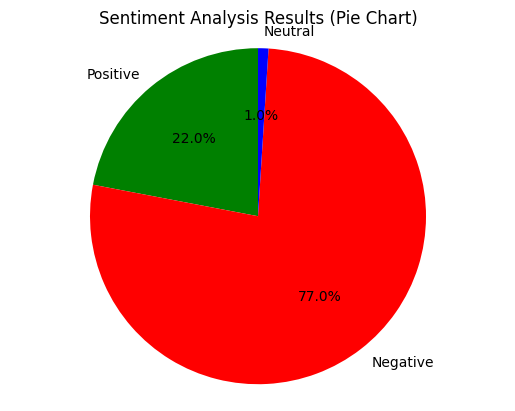

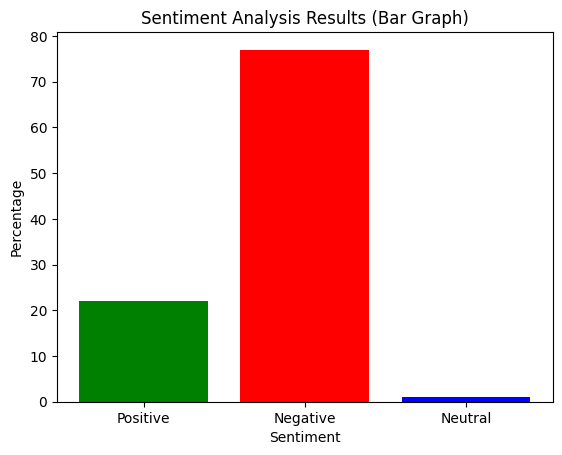

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Preprocessing function to clean the tweets
def preprocess_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Load the data from CSV
data = pd.read_csv('tweetsfull.csv')

# Preprocess the tweets
data['clean_text'] = data['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['Sentiment'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_seq_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Build the model
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_seq_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict sentiment for the test data
y_pred = model.predict(X_test_pad)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate the percentage of each sentiment
positive_percent = int(sum(y_pred) / len(y_pred) * 100)
negative_percent = int((len(y_pred) - sum(y_pred)) / len(y_pred) * 100)
neutral_percent = int(100 - positive_percent - negative_percent)

# Print the percentages
print('Positive Percent:', positive_percent)
print('Negative Percent:', negative_percent)
print('Neutral Percent:', neutral_percent)

# Plot the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percent, negative_percent, neutral_percent]
colors = ['green', 'red', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Analysis Results (Pie Chart)')
plt.show()

# Plot the bar graph
x = ['Positive', 'Negative', 'Neutral']
y = [positive_percent, negative_percent, neutral_percent]
plt.bar(x, y, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis Results (Bar Graph)')
plt.show()


In [ ]:
File